#### 1. Import and Inspect Data

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### 2. Data Cleaning

In [3]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df['Geography'].unique() # Have to do a One Hot Coding Here

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df['Gender'].unique() # Have to do a Label Encoding Here

array(['Female', 'Male'], dtype=object)

In [10]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender']) # Male=1, Female=0

In [ ]:
# One Hot Encoding

df = pd.get_dummies(df, columns = ['Geography'], drop_first = True) # Best way to instead of calling encoder
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


#### 3. Train test split

In [17]:
from sklearn.model_selection import train_test_split
x = df.drop('Exited', axis = 1) # axis=1 means operate along with column
y = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=42) # 80% training data and 20% testing data

#### 4. Feature Scaling

In [ ]:
# Standardization of data for better accuracy for regression alorithms

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train) # Scales the parameters (mean, std) and apply them to transform the training data
x_test = sc.transform(x_test) # It uses the same parameters on which data is trained

#### 5. Model Training and Evaluation

In [31]:
! pip install xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: C:\Users\lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Accuracy Score: 0.811
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.83      0.89      1857
           1       0.20      0.55      0.29       143

    accuracy                           0.81      2000
   macro avg       0.58      0.69      0.59      2000
weighted avg       0.91      0.81      0.85      2000



<function matplotlib.pyplot.show(close=None, block=None)>

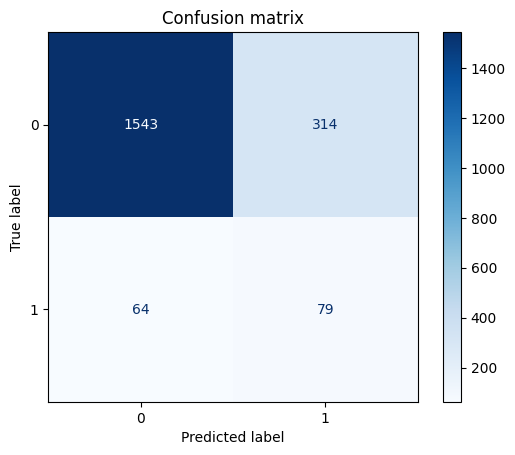

In [ ]:
# Logistic Rgeression

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_predict_lr = lr.predict(x_test)
print(f'Accuracy Score: {accuracy_score(y_predict_lr, y_test)}')
print(f'Classification Report:\n {classification_report(y_predict_lr, y_test)}')
cm = confusion_matrix(y_predict_lr, y_test)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap = 'Blues')
plt.title('Confusion matrix by Logistic Regression')
plt.show


accuracy_score: 0.8665
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92      1752
           1       0.48      0.75      0.58       248

    accuracy                           0.87      2000
   macro avg       0.72      0.82      0.75      2000
weighted avg       0.90      0.87      0.88      2000



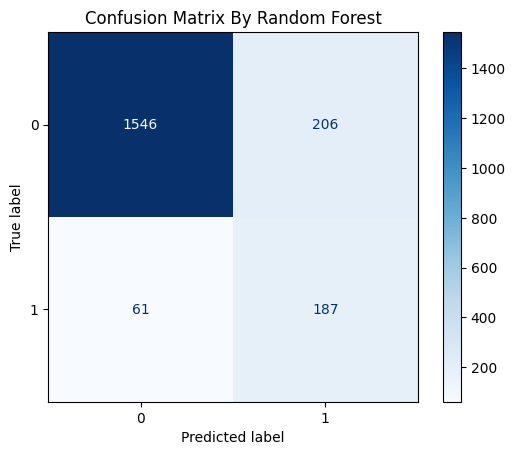

In [36]:
# Random Forest

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_predict_rf = rf.predict(x_test)
print(f'accuracy_score: {accuracy_score(y_predict_rf, y_test)}')
print(f'Classification Report:\n {classification_report(y_predict_rf, y_test)}')
cmrf = confusion_matrix(y_predict_rf, y_test)
disp_rf = ConfusionMatrixDisplay(cmrf)
disp_rf.plot(cmap = 'Blues')
plt.title('Confusion Matrix By Random Forest')
plt.show()

Accuracy socre: 0.8695
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92      1696
           1       0.55      0.72      0.63       304

    accuracy                           0.87      2000
   macro avg       0.75      0.81      0.77      2000
weighted avg       0.89      0.87      0.88      2000



C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:199: UserWarning: [21:30:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


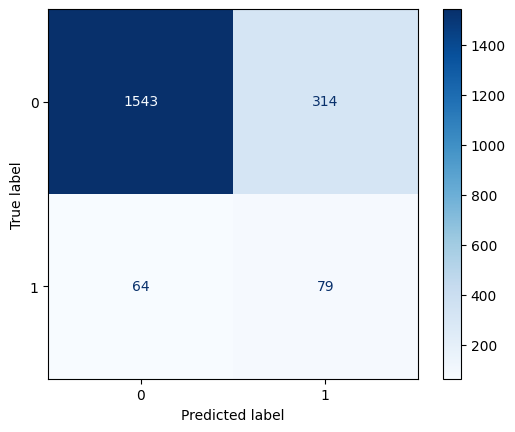

In [40]:
# XG Boost

xgb = XGBClassifier(use_label_encoder = False, eval_metric = 'logloss')
xgb.fit(x_train, y_train)
y_predict_xgb = xgb.predict(x_test)
print(f'Accuracy socre: {accuracy_score(y_predict_xgb, y_test)}')
print(f'Classification Report:\n {classification_report(y_predict_xgb, y_test)}')
cm_xgb = confusion_matrix(y_predict_xgb, y_test)
disp_xgb = ConfusionMatrixDisplay(cm_xgb)
disp.plot(cmap = 'Blues')
plt.show()

#### 6. Model Optimization (Grid Search CV)

In [ ]:
# Parameters of Xg boost algorithm
xgb.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'logloss',
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'use_label_encoder': False}

In [47]:
# For Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
parameters = {
                'n_estimators' : [100, 200, 300],
                'max_depth' : [3, 5, 7],
                'learning_rate' : [0.01, 0.1, 0.2]
}

grid = GridSearchCV(XGBClassifier(label_encoder = False, eval_metric = 'logloss'), parameters, cv = 3, scoring = 'accuracy', verbose = 1)
grid.fit(x_train, y_train)

print(f'Best Parameters: {grid.best_params_}')
print(f'Best Score: {grid.best_score_}')

Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:199: UserWarning: [22:44:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:199: UserWarning: [22:44:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:199: UserWarning: [22:44:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "label_encoder" } are not u

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Score: 0.8629991674896602


C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:199: UserWarning: [22:44:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [49]:
# Make a Pickling File 

import pickle

best_model = grid.best_estimator_
pickle.dump(best_model, open('churn_model.pkl', 'wb'))